In [47]:
import pandas as pd
import numpy as np

In [48]:
raw_data = pd.read_csv("kc_house_data.csv")
raw_data.head()

,sqft,floors,bedrooms,bathrooms,price
0,5650,1.0,3,1.00,221900.0
1,7242,2.0,3,2.25,538000.0
2,10000,1.0,2,1.00,180000.0
3,5000,1.0,4,3.00,604000.0
4,8080,1.0,3,2.00,510000.0


In [49]:
data = np.array(raw_data)

In [50]:
no_of_examples = data.shape[0]
no_of_features = data.shape[1]-1

In [51]:
no_train = int(0.8*no_of_examples)
no_train

17290

In [52]:
X_train = data[:no_train,:-1]
y_train = data[:no_train,-1]
X_test = data[no_train:,:-1]
y_test = data[no_train:,-1]

In [53]:
X_mean = np.mean(X_train,axis=0)
X_std = np.std(X_train,axis=0)
X_train = (X_train - X_mean)/X_std
X_test = (X_test-X_mean)/X_std

In [54]:
y_mean = np.mean(y_train,axis=0)
y_std = np.std(y_train,axis=0)
y_train = (y_train - y_mean)/y_std

In [55]:
class Linear_model:
    def __init__(self,m,X,y):
        #self.W = np.zeros((m,1))
        self.W = np.random.rand(m,1)
        self.b = 0
        self.X = X
        self.N = X.shape[0]
        self.y = y.reshape((self.N,1))
        
        
    def train(self, lr = 0.1, reg = 0):
        pred = (self.X).dot(self.W) + self.b
        err = pred - self.y
        err2 = err**2
        loss = np.sum(err2)/self.N
        loss += reg*np.sum(self.W**2)
        
        grad = (self.X).T.dot(err)
        grad *= 2/self.N
        
        grad += 2*reg*self.W
        
        self.W -= lr*grad
        self.b -= lr*np.sum(err)*2/self.N
        
        return loss
    
    def evaluate(self,X_test):
        return (X_test).dot(self.W) + self.b      
        
        
        

In [56]:
no_of_epochs = 500
model = Linear_model(no_of_features, X_train,y_train)
RMSE_plot = []
for i in range(no_of_epochs):
    loss = model.train(lr=0.05)
    print(loss)
    RMSE_plot.append(loss)

0.94789659246
0.906511362335
0.874250727287
0.848809657522
0.828526839681
0.812191848146
0.798912779081
0.788024850572
0.779026863283
0.771536692286
0.765259845631
0.759967047694
0.755478097757
0.751650125177
0.748368950906
0.745542663983
0.743096792988
0.740970637941
0.739114455566
0.737487278857
0.736055213236
0.734790094466
0.733668423938
0.732670518555
0.731779828101
0.730982384309
0.730266354233
0.729621676724
0.729039765475
0.728513265675
0.728035853974
0.727602073608
0.727207198135
0.726847118541
0.72651824946
0.726217451094
0.725941964034
0.725689354719
0.725457469671
0.725244397011
0.725048433979
0.724868059476
0.724701910765
0.724548763642
0.724407515514
0.724277170913
0.724156829046
0.724045673065
0.723942960789
0.723848016654
0.723760224694
0.723679022423
0.723603895455
0.723534372784
0.72347002261
0.723410448647
0.72335528684
0.723304202448
0.723256887426
0.723213058088
0.723172453008
0.723134831121
0.723099970017
0.723067664398
0.723037724669
0.723009975671
0.722984255521

In [57]:
import matplotlib.pyplot as plt

Text(0,0.5,'Mean Squared Error')

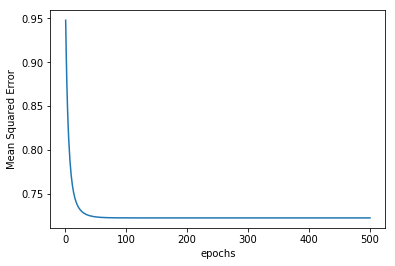

In [58]:
%matplotlib inline
plt.plot(1+np.array(range(no_of_epochs)),RMSE_plot)
plt.xlabel("epochs")
plt.ylabel("Mean Squared Error")

In [59]:
regs = [0,0.001,0.005,0.01,0.02,0.05,0.1,0.2,0.3,0.5,0.8,1.0,2.0,5.0]

In [60]:
loss_reg_train = []
loss_reg_test = []
no_of_epochs = 500
for reg in regs:
    model = Linear_model(no_of_features,X_train,y_train)
    for i in range(no_of_epochs):
        loss = model.train(lr = 0.05,reg = reg)
    loss_reg_train.append(loss)
    pred_test = model.evaluate(X_test)
    pred_test = (pred_test)*y_std + y_mean
    #test_loss = np.sqrt(np.sum(((pred_test - y_test)**2))/X_test.shape[0])
    test_loss = np.sqrt(np.mean(np.square(pred_test - y_test)))
    loss_reg_test.append(test_loss)
    
loss_reg_test

[421258.05972048827,
 421172.98303276254,
 420836.40174017986,
 420423.81706634135,
 419624.36309447483,
 417408.32827613177,
 414202.33405325614,
 409046.85916089627,
 404984.09149209288,
 398831.19107685285,
 392487.40937496856,
 389428.15479857766,
 380900.29223129846,
 374324.546523172]

Text(0,0.5,'Mean Squared error (Train)')

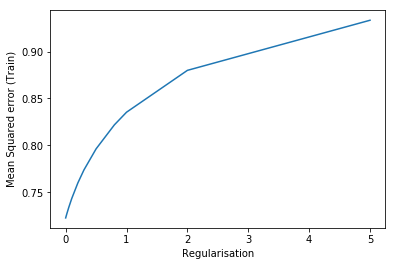

In [61]:
plt.plot(regs,loss_reg_train)
plt.xlabel("Regularisation")
plt.ylabel("Mean Squared error (Train)")

Text(0,0.5,'Mean Squared error (Test)')

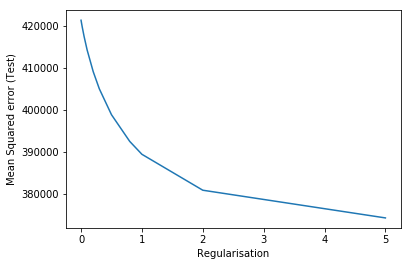

In [62]:
plt.plot(regs,loss_reg_test)
plt.xlabel("Regularisation")
plt.ylabel("Mean Squared error (Test)")